In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
#import re
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')


### LOAD DATA

In [2]:
train_data= pd.read_csv('train.csv')

In [3]:
train_data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [4]:
train_data.describe()


,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [6]:
test_data=pd.read_csv('test.csv')

In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68720 entries, 0 to 68719
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   POSTED_BY           68720 non-null  object 
 1   UNDER_CONSTRUCTION  68720 non-null  int64  
 2   RERA                68720 non-null  int64  
 3   BHK_NO.             68720 non-null  int64  
 4   BHK_OR_RK           68720 non-null  object 
 5   SQUARE_FT           68720 non-null  float64
 6   READY_TO_MOVE       68720 non-null  int64  
 7   RESALE              68720 non-null  int64  
 8   ADDRESS             68720 non-null  object 
 9   LONGITUDE           68720 non-null  float64
 10  LATITUDE            68720 non-null  float64
dtypes: float64(3), int64(5), object(3)
memory usage: 5.8+ MB


In [8]:
train_data.isna().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [9]:
test_data.isna().sum()

POSTED_BY             0
UNDER_CONSTRUCTION    0
RERA                  0
BHK_NO.               0
BHK_OR_RK             0
SQUARE_FT             0
READY_TO_MOVE         0
RESALE                0
ADDRESS               0
LONGITUDE             0
LATITUDE              0
dtype: int64

# EDA

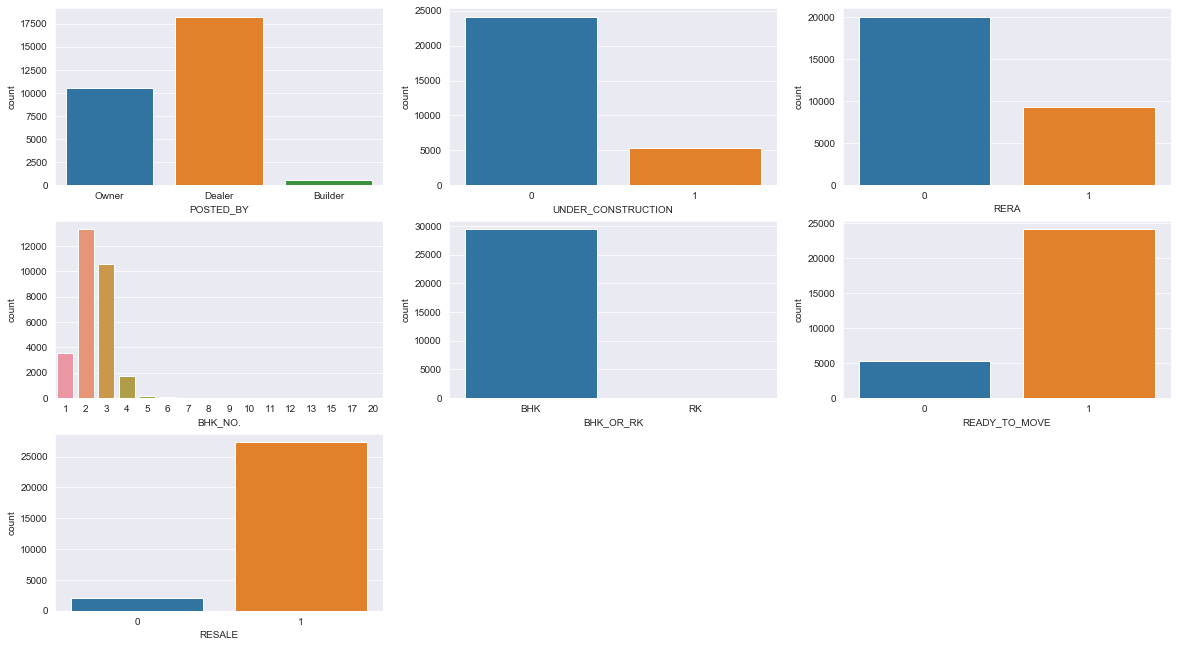

In [10]:
i=1
plt.figure(figsize=(20,15))
for col in ['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK', 'READY_TO_MOVE', 'RESALE']:
    plt.subplot(4,3,i)
    sns.countplot(train_data[col])
    i+=1

In [11]:
train_data.drop(['ADDRESS', 'BHK_OR_RK'], axis=1, inplace=True )
test_data.drop(['ADDRESS', 'BHK_OR_RK'], axis=1, inplace=True )

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   SQUARE_FT              29451 non-null  float64
 5   READY_TO_MOVE          29451 non-null  int64  
 6   RESALE                 29451 non-null  int64  
 7   LONGITUDE              29451 non-null  float64
 8   LATITUDE               29451 non-null  float64
 9   TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(1)
memory usage: 2.2+ MB


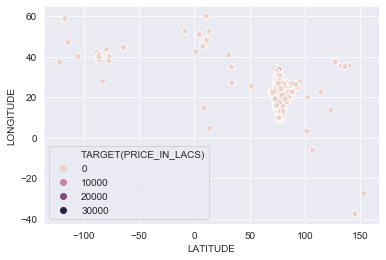

In [13]:
sns.scatterplot(x= 'LATITUDE', y= 'LONGITUDE', hue= 'TARGET(PRICE_IN_LACS)', data=train_data)

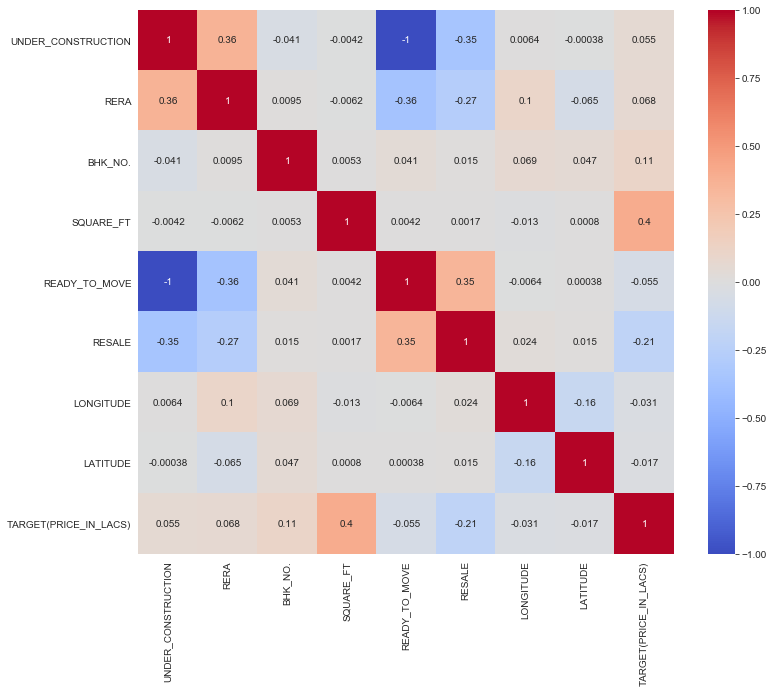

In [14]:
plt.figure(figsize=(12,10))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')

### PREPROCES
Ready to Move and Under Construction are completely co-related. So we drop one of them to prevent overfitting

In [15]:
train_data.drop('READY_TO_MOVE', axis=1, inplace=True)
test_data.drop('READY_TO_MOVE', axis=1, inplace=True)

In [16]:
train_data['POSTED_BY']= train_data['POSTED_BY'].replace({'Owner':0, 'Dealer':1, 'Builder':2})
test_data['POSTED_BY']= test_data['POSTED_BY'].replace({'Owner':0, 'Dealer':1, 'Builder':2})

In [17]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  int64  
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   SQUARE_FT              29451 non-null  float64
 5   RESALE                 29451 non-null  int64  
 6   LONGITUDE              29451 non-null  float64
 7   LATITUDE               29451 non-null  float64
 8   TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 2.0 MB


# LINEAR REGRESSION

### CREATING MODEL 

In [18]:
X= train_data.drop('TARGET(PRICE_IN_LACS)', axis=1)
y= train_data['TARGET(PRICE_IN_LACS)']

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2)

In [20]:

from sklearn.linear_model import LinearRegression

In [21]:
lr = LinearRegression().fit(X_train, y_train)

In [22]:
from sklearn.metrics import mean_squared_error

In [23]:
train_pred= lr.predict(X_train)
test_pred= lr.predict(X_test)
train_error= np.sqrt(mean_squared_error(y_train, train_pred))
test_error= np.sqrt(mean_squared_error(y_test, test_pred))
#print(f"{lr}: \n ")
print(f"Training error: {train_error} \n")
print(f"Testing error: {test_error} \n")

Training error: 593.9204458477892 

Testing error: 520.7926430792148 



In [24]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))


Training set score: 0.25
Test set score: 0.05


In [25]:
print("Test set R^2: {:.2f}".format(lr.score(X_test, y_test)))

Test set R^2: 0.05


In [26]:
MRE_sum = 0
prediction = lr.predict(X_train)

numinator = abs(np.subtract(prediction , y_train))
MRE_sum = np.divide(numinator , y_train)
MRE_sum = np.sum(MRE_sum)

MRE = MRE_sum / len(y_train)
print("MEAN RELATIVE ERROR = " ,MRE)

MEAN RELATIVE ERROR =  1.890293537697551


### KNEIGHBOURS REGRESSION

In [36]:
from sklearn import metrics
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsRegressor

In [37]:
 from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.fit_transform(X_test)

In [38]:
K_reg = KNeighborsRegressor(n_neighbors=10, p=2, metric='euclidean')

In [39]:
K_reg.fit(X_train,y_train.ravel())

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

In [40]:
K_reg_pred =K_reg.predict(X_test)

In [41]:
K_reg_pred

array([56.1 , 30.9 , 39.87, ..., 89.1 , 99.55, 74.09])

In [42]:
print("Test set predictions:\n{}".format(K_reg.predict(X_test)))
y_test

Test set predictions:
[56.1  30.9  39.87 ... 89.1  99.55 74.09]


8477     110.0
13747     56.0
12791     26.0
24372    150.0
9712     130.0
         ...  
6471      68.0
20408    380.0
787      130.0
21213     69.5
12324     87.0
Name: TARGET(PRICE_IN_LACS), Length: 5891, dtype: float64

In [43]:
print("Test set R^2: {:.2f}".format(K_reg.score(X_test, y_test)))

Test set R^2: 0.87


In [44]:
MRE_sum = 0
prediction = K_reg.predict(X_train)

numinator = abs(np.subtract(prediction , y_train))
MRE_sum = np.divide(numinator , y_train)
MRE_sum = np.sum(MRE_sum)

MRE = MRE_sum / len(y_train)
print("MEAN RELATIVE ERROR = " ,MRE)

MEAN RELATIVE ERROR =  0.9667633513085532


# -------------------------------------------END-----------------------------------------